In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import StandardScaler

In [2]:
"""
for _ in range(4):
    np.random.seed(121)
    for _ in range(10):
        print(np.random.randint(1,10), end=' ')
    print('\n')
"""

"\nfor _ in range(4):\n    np.random.seed(121)\n    for _ in range(10):\n        print(np.random.randint(1,10), end=' ')\n    print('\n')\n"

In [3]:
# 4x4 랜덤행렬 생성
np.random.seed(121) # seed 값을 부여하면 랜덤으로 생성하는 숫자가 일정함
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [4]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U,3))
print('Sigma Value:\n', np.round(Sigma,3))
print('V transpose matrix:\n', np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [5]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
sm = np.diag(Sigma)
print('Sigma_mat\n', np.round(sm,3))

a_ = np.dot(np.dot(U, sm), Vt)
print(np.round(a_,3))

Sigma_mat
 [[3.423 0.    0.    0.   ]
 [0.    2.023 0.    0.   ]
 [0.    0.    0.463 0.   ]
 [0.    0.    0.    0.079]]
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [6]:
# 의존성 부여 (Sigma 차원 축소 확인 목적)
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [7]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [8]:
iris = load_iris()
data = iris.data
label = iris.target

In [9]:
# U 행렬의 경우는 Sigma와 내적을 수행함르로 Sigma의 앞 2행에 대응되는 2열만 추출
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])

# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)

(4, 2) (2, 2) (2, 4)


In [10]:
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [11]:
tsvd = TruncatedSVD(n_components=2)
tsvd_data = tsvd.fit_transform(data)
iris_tsvd = tsvd.transform(data)

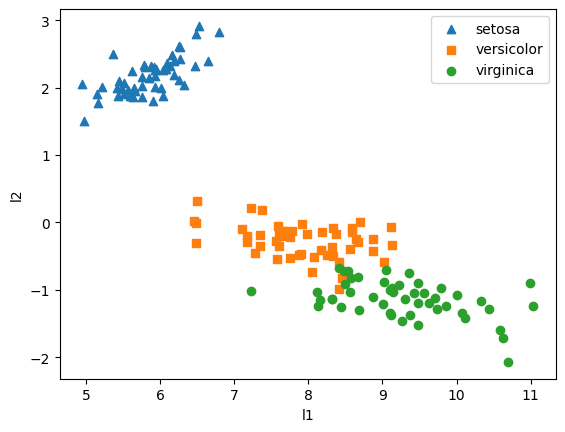

In [12]:
df = pd.DataFrame(tsvd_data,columns=['l1','l2'])
df['label']=label
markers=['^','s','o']
tns = iris.target_names
for i, marker in enumerate(markers):
    f_i = df['label']==i #품종별로 필터링
    df_i = df[f_i] #특정 품종만 추출
    x_data = df_i['l1'] #p1컬럼 을 x 데이터로 설정
    y_data = df_i['l2'] #p2 컬럼을 y 데이터로 설정
    plt.scatter(x_data,y_data,marker=marker,label=tns[i])
plt.xlabel('l1')
plt.ylabel('l2')
plt.legend()
plt.show()

In [13]:
rfc = RandomForestClassifier()
s = cross_val_score(rfc, tsvd_data, label, scoring='accuracy', cv=5)
print('정확도: ', s)
print('평균: ', s.mean())

정확도:  [1.         0.96666667 0.96666667 0.96666667 1.        ]
평균:  0.9800000000000001


In [14]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

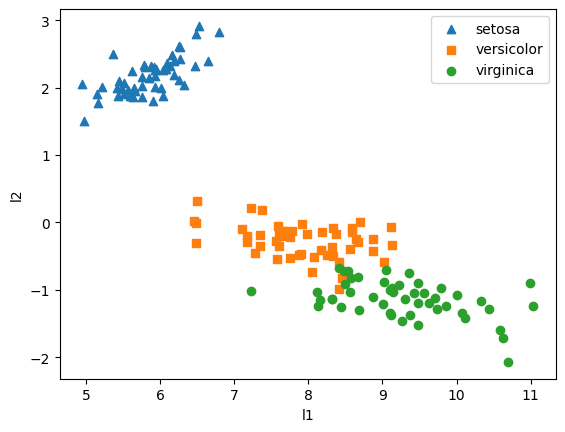

In [15]:
df = pd.DataFrame(tsvd_data,columns=['l1','l2'])
df['label']=label
markers=['^','s','o']
tns = iris.target_names
for i, marker in enumerate(markers):
    f_i = df['label']==i #품종별로 필터링
    df_i = df[f_i] #특정 품종만 추출
    x_data = df_i['l1'] #p1컬럼 을 x 데이터로 설정
    y_data = df_i['l2'] #p2 컬럼을 y 데이터로 설정
    plt.scatter(x_data,y_data,marker=marker,label=tns[i])
plt.xlabel('l1')
plt.ylabel('l2')
plt.legend()
plt.show()

In [16]:
ss = StandardScaler()
sd = ss.fit_transform(data)
tsvd = TruncatedSVD(n_components=2)
tsvd_data = tsvd.fit_transform(sd)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(sd)

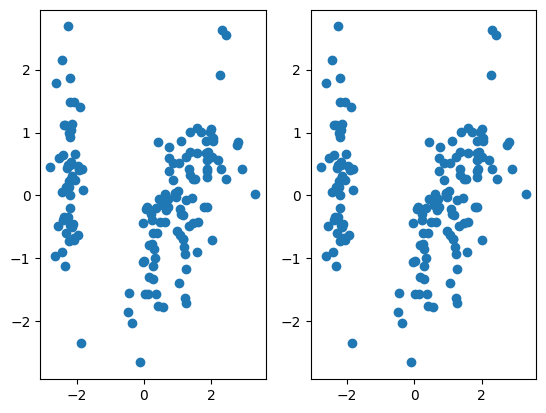

In [17]:
_,axes = plt.subplots(ncols=2)
df1 = pd.DataFrame(tsvd_data,columns=['l1','l2'])
x_data = df1['l1'] #p1컬럼 을 x 데이터로 설정
y_data = df1['l2'] #p2 컬럼을 y 데이터로 설정
axes[0].scatter(x_data,y_data,marker='o')

df2 = pd.DataFrame(pca_data,columns=['l1','l2'])
x_data = df2['l1'] #p1컬럼 을 x 데이터로 설정
y_data = df2['l2'] #p2 컬럼을 y 데이터로 설정
axes[1].scatter(x_data,y_data,marker='o')

plt.show()

In [18]:
nmf = NMF(n_components=2)
nmf.fit(data)
iris_nmf = nmf.transform(data)

/opt/anaconda3/envs/xgboost/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

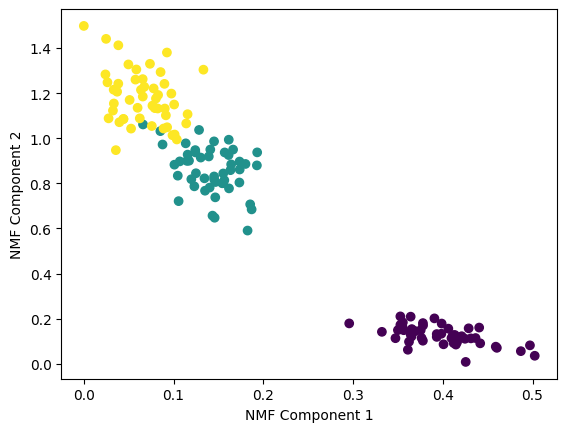

In [19]:
plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')